# Chapter 2 - Regression

In [250]:
import numpy as np
import matplotlib.pyplot as plt

## Sampling from a Gaussian Process

In [343]:
def squared_exponential_covariance(x: np.array, y: np.array, length_scale: float=1) -> int:
    return np.exp(-0.5*(np.subtract.outer(x, y)/length_scale)**2)

In [344]:
def sample_from_gp(mean, cov, num_samples):
    samples = []
    epsilon = 0.0001
    cholesky_decomposition = np.linalg.cholesky(cov + epsilon * np.identity(cov.shape[0]))
    for _ in range(num_samples):
        u = np.random.normal(0, 1, mean.shape)
        sample = mean + np.matmul(cholesky_decomposition, u)
        samples.append(sample)
    return np.asarray(samples)

In [345]:
def plot_gp(mean, cov, x, observations=None, num_samples=1):
    samples = sample_from_gp(mean, cov, num_samples)
    confidence_interval = 1.96 * np.sqrt(np.diag(cov))
    plt.figure(figsize=(8,6))
    plt.fill_between(x, mean+confidence_interval, mean-confidence_interval, alpha=0.1)
    for sample in samples:
        plt.plot(x, sample, lw=1, ls='--', zorder=1)
    if observations is not None:
        plt.scatter(observations[0], observations[1], c='orange', zorder=2)

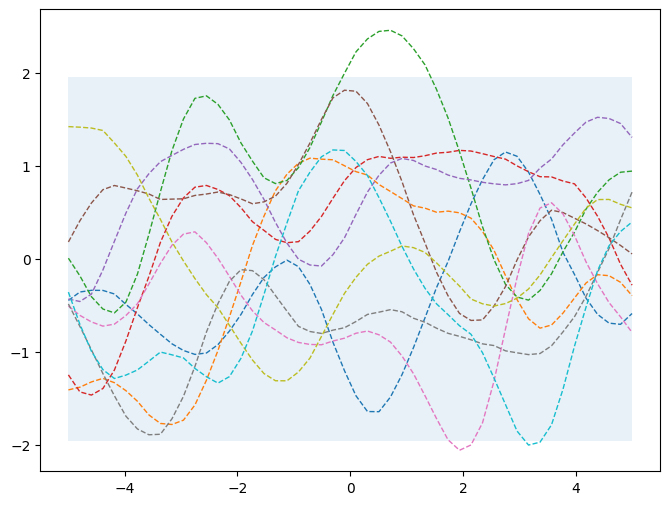

In [346]:
num_points = 50
mean = np.zeros(num_points)
x = np.linspace(-5, 5, num_points)
covariance_matrix = squared_exponential_covariance(x, x)
plot_gp(mean, covariance_matrix, x, None, 10)

## Predictions with Noise-Free Observations

In [347]:
def compute_noise_free_posterior(x, y, x_star):
    k_star_x = squared_exponential_covariance(x_star, x)
    k_x_x = squared_exponential_covariance(x, x)
    k_star_star = squared_exponential_covariance(x_star, x_star)
    k_x_star = squared_exponential_covariance(x, x_star)
    posterior_mean = np.linalg.multi_dot([k_star_x, np.linalg.inv(k_x_x), y])
    posterior_covariance = np.subtract(k_star_star, np.linalg.multi_dot([k_star_x, np.linalg.inv(k_x_x), k_x_star]))
    return posterior_mean, posterior_covariance

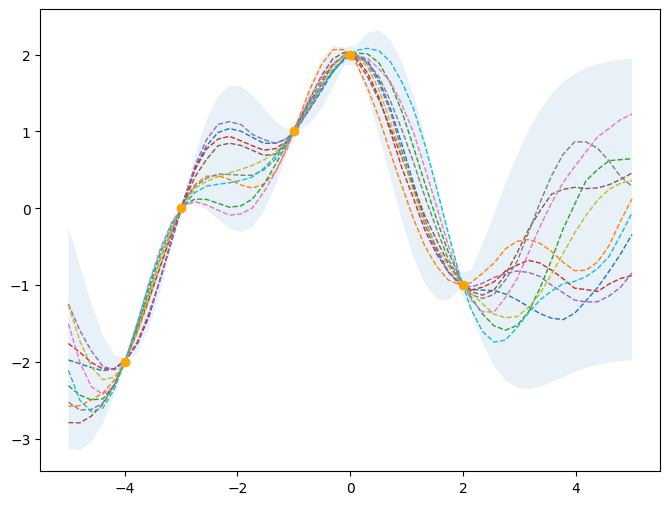

In [348]:
observed_x = np.array([-4, -3, -1, 0, 2])
observed_y = np.array([-2, 0, 1, 2, -1])
observations = np.array([observed_x, observed_y])
posterior_mean, posterior_covariance = compute_noise_free_posterior(observed_x, observed_y, x)
plot_gp(posterior_mean, posterior_covariance, x, observations, 10)

## Predictions with Noisy Observations

In [349]:
def compute_noisy_posterior(x, y, x_star, noise):
    k_star_x = squared_exponential_covariance(x_star, x)
    k_x_x = squared_exponential_covariance(x, x)
    k_star_star = squared_exponential_covariance(x_star, x_star)
    k_x_star = squared_exponential_covariance(x, x_star)
    posterior_mean = np.linalg.multi_dot([k_star_x, np.linalg.inv(k_x_x + noise**2*np.identity(k_x_x.shape[0])), y])
    posterior_covariance = np.subtract(k_star_star, np.linalg.multi_dot([k_star_x, np.linalg.inv(k_x_x + noise**2*np.identity(k_x_x.shape[0])), k_x_star]))
    return posterior_mean, posterior_covariance

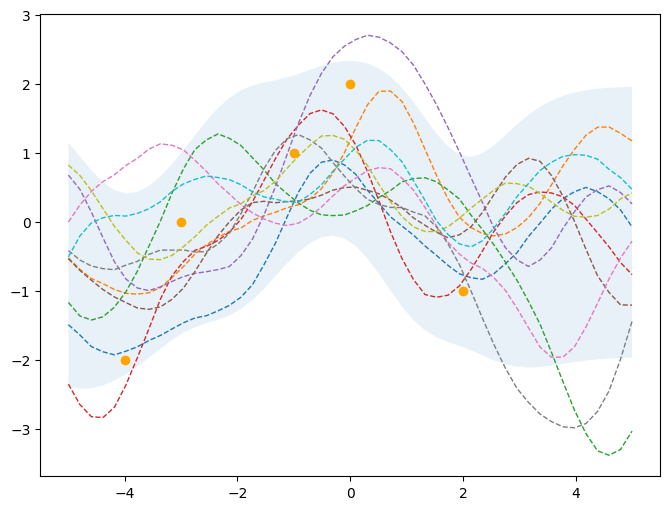

In [350]:
posterior_mean, posterior_covariance = compute_noisy_posterior(observed_x, observed_y, x, 1)
plot_gp(posterior_mean, posterior_covariance, x, observations, 10)